In [1]:
from ipaddress import summarize_address_range
from scipy.io import mmread
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Mouse gastrulation
import scanpy
adata_paper =scanpy.read ('/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/gastrulation.h5ad')

In [3]:
paper_stage=set(adata_paper.obs.stage)
paper_celltype=set(adata_paper.obs.celltype)
print(paper_stage)
print(paper_celltype)

{'E8.25', 'E7.25', 'E6.75', 'E8.0', 'E7.75', 'E8.5', 'E7.0', 'E7.5', 'E6.5'}
{'Endothelium', 'NMP', 'Mesenchyme', 'Erythroid1', 'Visceral endoderm', 'Epiblast', 'Erythroid2', 'Cardiomyocytes', 'Neural crest', 'Blood progenitors 1', 'Allantois', 'ExE mesoderm', 'Paraxial mesoderm', 'Blood progenitors 2', 'Caudal Mesoderm', 'Erythroid3', 'Pharyngeal mesoderm', 'Primitive Streak', 'Nascent mesoderm', 'Mixed mesoderm', 'Forebrain/Midbrain/Hindbrain', 'Rostral neurectoderm', 'Anterior Primitive Streak', 'Notochord', 'Somitic mesoderm', 'Spinal cord', 'Haematoendothelial progenitors', 'PGC', 'Intermediate mesoderm', 'Caudal epiblast', 'Gut', 'Def. endoderm', 'Surface ectoderm', 'Caudal neurectoderm'}


In [5]:
import scvelo as scv
from utilities import adata_to_raw
import anndata
import scanpy



In [8]:
# gastrulation all data 
import scanpy
import scvelo as scv

adata_paper =scanpy.read ('/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/gastrulation.h5ad')
adata_paper_bkup=adata_paper.copy()

In [13]:
adata_paper

AnnData object with n_obs × n_vars = 89267 × 53801
    obs: 'barcode', 'sample', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'umapX', 'umapY', 'haem_gephiX', 'haem_gephiY', 'haem_subclust', 'endo_gephiX', 'endo_gephiY', 'endo_trajectoryName', 'endo_trajectoryDPT', 'endo_gutX', 'endo_gutY', 'endo_gutDPT', 'endo_gutCluster', 'cell_velocyto_loom'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'

In [14]:
adata_paper.obs

,barcode,sample,stage,sequencing.batch,theiler,doub.density,doublet,cluster,cluster.sub,cluster.stage,...,haem_subclust,endo_gephiX,endo_gephiY,endo_trajectoryName,endo_trajectoryDPT,endo_gutX,endo_gutY,endo_gutDPT,endo_gutCluster,cell_velocyto_loom
index,,,,,,,,,,,,,,,,,,,,,
cell_1,AAAGGCCTCCACAA,1,E6.5,1,TS9,0.043114,False,2.0,4.0,2.0,...,nan,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,possorted_genome_bam_7SUA3:AAAGGCCTCCACAAx
cell_2,AACAAACTCGCCTT,1,E6.5,1,TS9,1.129713,False,12.0,1.0,1.0,...,nan,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,possorted_genome_bam_7SUA3:AACAAACTCGCCTTx
cell_6,AACATATGAATCGC,1,E6.5,1,TS9,1.254709,False,1.0,1.0,3.0,...,nan,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,possorted_genome_bam_7SUA3:AACATATGAATCGCx
cell_8,AACCGATGGCTTCC,1,E6.5,1,TS9,1.345759,False,2.0,1.0,2.0,...,nan,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,possorted_genome_bam_7SUA3:AACCGATGGCTTCCx
cell_9,AACGTGTGCTCTAT,1,E6.5,1,TS9,1.146369,False,2.0,1.0,2.0,...,nan,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,possorted_genome_bam_7SUA3:AACGTGTGCTCTATx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_139326,TTTCGAACGGTGAG,37,E8.5,3,TS12,0.476074,False,18.0,2.0,19.0,...,Ery4,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,possorted_genome_bam_DRLGW:TTTCGAACGGTGAGx
cell_139327,TTTCGAACTAACCG,37,E8.5,3,TS12,0.303505,False,18.0,2.0,19.0,...,Ery4,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,possorted_genome_bam_DRLGW:TTTCGAACTAACCGx
cell_139329,TTTCTACTGGGATG,37,E8.5,3,TS12,0.344835,False,13.0,2.0,18.0,...,nan,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,possorted_genome_bam_DRLGW:TTTCTACTGGGATGx


In [15]:
# early_endoderm
stage_endo_blood=['E8.25', 'E8.5', 'E7.0', 'E7.75', 'E8.0', 'E6.5', 'E7.5', 'E7.25', 'E6.75']
celltype_endo_blood=['Anterior Primitive Streak','Def. endoderm','Gut','Visceral endoderm']

Index(['Sox17', 'Arfgef1', 'Cpa6', 'Tram1', 'Eya1', 'Mcm3', 'Ogfrl1', 'Phf3',
       'Bag2', 'Fhl2',
       ...
       'Wnk3', 'Acot9', 'Rbbp7', 'Pir', 'Gpm6b', 'Gm21887', 'Uty', 'Ddx3y',
       'Eif2s3y', 'Gm47283'],
      dtype='object', name='index', length=2000)

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/early_endodrem/scatter_s0_u0/CLUSTER.pdf


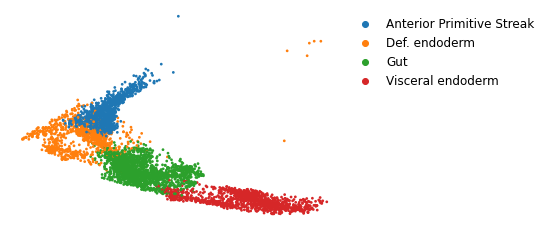

computing neighbors
    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/early_endodrem/scatter_s0_u0/Sox17.pdf
saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/early_endodrem/scatter_s0_u0/Arfgef1.pdf
saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/early_endodrem/scatter_s0_u0/Cpa6.pdf
saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/early_endodrem/scatter_s0_u0/Tram1.pdf
saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/early_endodrem/scatter_s0_u0/Eya1.pdf
saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/early_endodrem/scatter_s0_u0/Mcm3.pdf
saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity

In [33]:
# adata_paper_endo_blood=adata_paper[adata_paper.obs.stage.isin(stage_endo_blood) & adata_paper.obs.celltype.isin(celltype_endo_blood),:].copy()
# adata_paper_endo_blood.var_names # 53801 genes
# adata_paper_endo_blood.obs_names # 5066 cells
savedir='/Users/wanglab/Documents/ShengyuLi/Velocity/data/early_endodrem/scatter_s0_u0/'


scv.pl.scatter(adata_paper_endo_blood, c='celltype', s=30, legend_align_text=True, legend_fontsize=12, title='',save=savedir+'CLUSTER'+'.pdf')
# scv.pp.filter_and_normalize(adata_paper_endo_blood, min_shared_counts=30, n_top_genes=2000)

gene_list=adata_paper_endo_blood.var_names

n_list=[200]
for n in n_list:
    scv.pp.moments(adata_paper_endo_blood,n_neighbors=n)
    for gene in gene_list:
        scv.pl.scatter(adata_paper_endo_blood, basis=gene, c='celltype', vkey='velocity', frameon='artist', s=40, dpi=80,show=False,save=savedir+gene+'.pdf')


# for n in n_list:
#     scv.pp.moments(adata_paper_endo_blood,n_neighbors=n)
#     # scv.tl.velocity(adata_paper_endo_blood)
#     print(adata_paper_endo_blood.var_names)
#     # for gene in adata_paper_endo_blood.var_names[30:50]:
#     for gene in adata_paper_endo_blood.var_names[30:50]:
#         adata_onegene=adata_paper_endo_blood[:,adata_paper_endo_blood.var.index.isin([gene])].copy()

#         s0_onegene = adata_onegene.layers['Ms'].T[0]
#         u0_onegene = adata_onegene.layers['Mu'].T[0]

#         plt.figure()
#         plt.title('n'+str(n)+"_"+gene)
#         plt.scatter(s0_onegene,u0_onegene,alpha=0.3)

In [16]:
# adata_paper_endo_blood adata to raw (using 20 to 25 # del 'Endothelium'(green))

In [35]:
adata_paper_endo_blood

AnnData object with n_obs × n_vars = 5066 × 2000
    obs: 'barcode', 'sample', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'umapX', 'umapY', 'haem_gephiX', 'haem_gephiY', 'haem_subclust', 'endo_gephiX', 'endo_gephiY', 'endo_trajectoryName', 'endo_trajectoryDPT', 'endo_gutX', 'endo_gutY', 'endo_gutDPT', 'endo_gutCluster', 'cell_velocyto_loom', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'celltype_colors', 'neighbors'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [37]:
# from utilities import adata_to_raw_with_embed
def adata_to_raw_with_embed(adata,save_path,gene_list=None):
    '''convert adata to raw data format with embedding info
    data:
    save_path:
    gene_list (optional):

    return: panda dataframe with gene_list,u0,s0,cellID,clusters,embedding1,embedding2
    
    run: test=adata_to_raw(adata,'/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer-development_20220128/src/output/test.csv',gene_list=genelist_all)
    ref: mel - loom_to_celldancer_raw.py
    '''
    def adata_to_raw_one_gene(data, para, gene):
        '''
        convert adata to raw data format (one gene)
        data: an anndata
        para: the varable name of u0, s0, and gene name
        para = ['Mu', 'Ms']
        '''
        data2 = data[:, data.var.index.isin([gene])].copy()
        u0 = data2.layers[para[0]][:,0].copy().astype(np.float32)
        s0 = data2.layers[para[1]][:,0].copy().astype(np.float32)
        raw_data = pd.DataFrame({'gene_list':gene, 'u0':u0, 's0':s0})
        return(raw_data)

    if gene_list is None: gene_list=adata.var.index

    for i,gene in enumerate(gene_list):
        print("processing:"+str(i)+"/"+str(len(adata.var_names)))
        data_onegene = adata_to_raw_one_gene(adata, para=['Mu', 'Ms'], gene=gene)
        if i==0:
            data_onegene.to_csv(save_path,header=True,index=False)
        else:
            data_onegene.to_csv(save_path,mode='a',header=False,index=False)
    
    # cell info
    gene_num=len(gene_list)
    cellID=pd.DataFrame({'cellID':adata.obs.index})
    celltype_meta=adata.obs['celltype'].reset_index(drop=True)
    celltype=pd.DataFrame({'clusters':celltype_meta})#
    embed_map=pd.DataFrame({'embedding1':adata.obsm['X_umap'][:,0],'embedding2':adata.obsm['X_umap'][:,1]})
    # embed_info_df = pd.concat([embed_info]*gene_num)
    embed_info=pd.concat([cellID,celltype,embed_map],axis=1)
    embed_raw=pd.concat([embed_info]*gene_num)
    embed_raw=embed_raw.reset_index(drop=True)
    
    raw_data=pd.read_csv(save_path)
    raw_data=pd.concat([raw_data,embed_raw],axis=1)
    
    raw_data.to_csv(save_path,header=True,index=False)

    return(raw_data)

In [38]:
import numpy as np
import pandas as pd
# gene_list=['Sox17', '2410006H16Rik', 'Smim1', 'Hba-x', 'Abi3', 'Akap12', 'Car4', 'Degs1','Dhrs11','Fn1','Grb10','H2afv','Hba-a1','Hspd1','Hspe1','Igf1','Igf2bp1','Klf7','Sgk3','Slc4a1','Tagln2','Timp3','Tns3','Tpd52l1','Ube2d1','Ugp2']
# raw=adata_to_raw_with_embed(adata_paper_endo_blood,save_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/mouse_endo_blood20to25.csv',gene_list=gene_list)
scv.pp.moments(adata_paper_endo_blood,n_neighbors=200)
raw=adata_to_raw_with_embed(adata_paper_endo_blood,save_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/mouse_early_endodren_5_7_8_34_2000_genes_moment200.csv')
raw

computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
processing:0/2000
processing:1/2000
processing:2/2000
processing:3/2000
processing:4/2000
processing:5/2000
processing:6/2000
processing:7/2000
processing:8/2000
processing:9/2000
processing:10/2000
processing:11/2000
processing:12/2000
processing:13/2000
processing:14/2000
processing:15/2000
processing:16/2000
processing:17/2000
processing:18/2000
processing:19/2000
processing:20/2000
processing:21/2000
processing:22/2000
processing:23/2000
processing:24/2000
processing:25/2000
processing:26/2000
processing:27/2000
processing:28/2000
processing:29/2000
processing:30/2000
processing:31/2000
processing:32/2000
processing:33/2000
processing:34/2000
processing:35/2000
processing:36/2000
processing:37/2000
processing:38/2000
processing:39/2000
processing:40/2000
processing:41/2000
processing:42/2000
processing:43/2000
processing:44/2000
processing:4

,gene_list,u0,s0,cellID,clusters,embedding1,embedding2
0,Sox17,0.000000,4.357655,cell_12,Visceral endoderm,-2.112586,-12.874275
1,Sox17,0.000000,6.173903,cell_24,Visceral endoderm,-2.119421,-12.977172
2,Sox17,0.000000,3.421899,cell_64,Visceral endoderm,-1.581869,-13.631184
3,Sox17,0.000000,3.815380,cell_115,Visceral endoderm,-3.099537,-12.091047
4,Sox17,0.003503,3.731432,cell_167,Visceral endoderm,-1.553151,-13.578660
...,...,...,...,...,...,...,...
10131995,Gm47283,0.122670,0.494229,cell_139143,Gut,-6.202221,-9.662496
10131996,Gm47283,0.042917,0.412416,cell_139168,Def. endoderm,-8.622413,-8.895802
10131997,Gm47283,0.061018,0.834528,cell_139175,Gut,-5.593981,-9.050422
10131998,Gm47283,0.054430,0.667903,cell_139214,Gut,-4.722421,-10.669286


In [6]:
celltype_endo_blood=['Anterior Primitive Streak','Def. endoderm','Gut','Visceral endoderm']

In [9]:
adata_paper_01=adata_paper_bkup[adata_paper_bkup.obs.celltype.isin(celltype_endo_blood),:].copy()

In [10]:
adata_paper_01

AnnData object with n_obs × n_vars = 5066 × 53801
    obs: 'barcode', 'sample', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'umapX', 'umapY', 'haem_gephiX', 'haem_gephiY', 'haem_subclust', 'endo_gephiX', 'endo_gephiY', 'endo_trajectoryName', 'endo_trajectoryDPT', 'endo_gutX', 'endo_gutY', 'endo_gutDPT', 'endo_gutCluster', 'cell_velocyto_loom'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'

In [11]:
scv.pp.moments(adata_paper_01,n_neighbors=200)

Normalized count data: X, spliced, unspliced.
computing neighbors
    finished (0:00:06) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:13) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


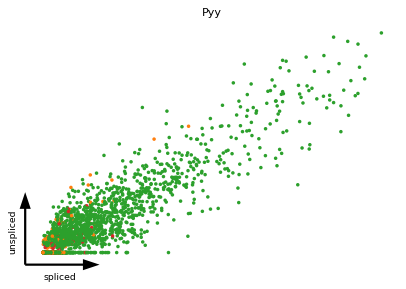

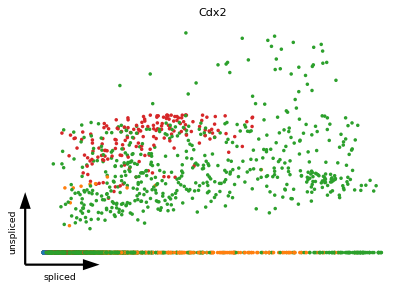

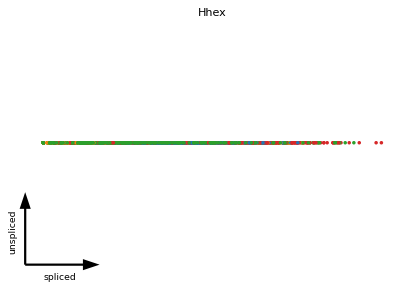

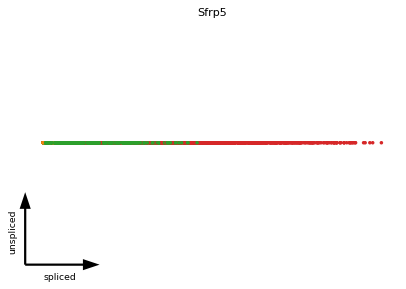

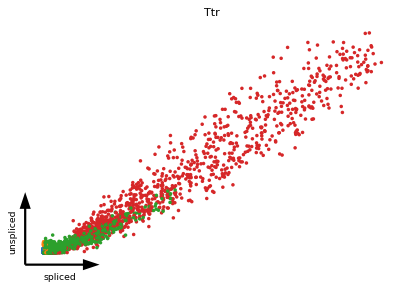

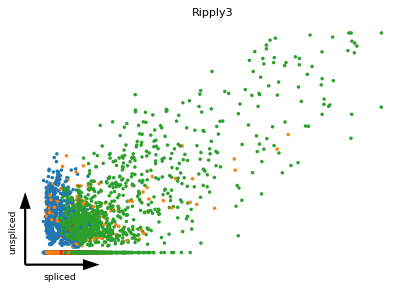

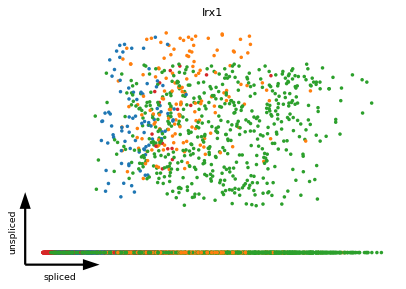

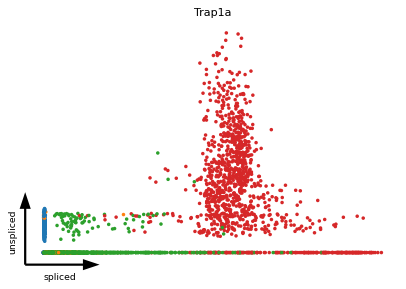

In [18]:
gene_list=adata_paper_01.var_names
gene_list=['Pyy','Cdx2','Hhex','Sfrp5','Ttr','Ripply3','Irx1','Trap1a']
for gene in gene_list:
    scv.pl.scatter(adata_paper_01, basis=gene, c='celltype', vkey='velocity', frameon='artist', s=40, dpi=80,show=False)


